In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [25]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [26]:
len(df_all)

662793

In [27]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [28]:
df_all['Term_novelty'].head()

0    0.888159
1    0.353749
2    0.855796
3    0.706213
4    0.732386
Name: Term_novelty, dtype: float64

In [29]:
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty'])

In [30]:
for col in df_all.columns.values:
    df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [31]:
df_all.head()

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Term_novelty,Topic_novelty,Freq_relationship,Category_F_F,...,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,Term_novelty_squared,Topic_novelty_squared
0,-0.378630,-0.374222,-0.404143,0.310757,-0.237655,-0.256807,1.192500,0.760591,-0.763602,-0.279297,...,-0.147816,-0.180747,-0.222819,-0.494136,-0.048805,-0.145199,-0.353816,7.108369,0.675549,-0.263517
1,-0.378630,0.271376,0.045725,-0.524815,-0.134880,-0.344430,-0.684284,1.720813,-0.763602,-0.279297,...,-0.147816,-0.180747,-0.222819,-0.494136,-0.048805,-0.145199,-0.353816,4.630799,-0.851137,1.226114
2,-0.435317,-0.374222,-0.404143,-0.524815,-0.265701,-0.383373,1.078844,1.725404,-0.763602,-0.279297,...,-0.147816,-0.180747,-0.222819,-0.494136,-0.048805,-0.145199,-0.353816,7.098103,0.262348,1.236004
3,-0.180227,-0.274899,0.355009,-0.524815,-0.126547,-0.143222,0.553528,1.315627,-0.763602,-0.279297,...,-0.147816,-0.180747,-0.222819,-0.494136,-0.048805,-0.145199,-0.353816,7.101525,-1.110199,0.456933
4,-0.180227,-0.225238,0.355009,-0.524815,-0.126547,-0.143222,0.645445,1.068638,-0.763602,-0.279297,...,-0.147816,-0.180747,-0.222819,-0.494136,-0.048805,-0.145199,-0.353816,7.101525,-0.933802,0.088768


### Logistic

In [32]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term_novelty', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adv

In [33]:
def run_logit(df, field):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared','History',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [34]:
def run_ols(df, field):
    df = run_logit(df, field)
    df['Kudos'] = np.log(df['Kudos']+0.001)
    df['Hits'] = np.log(df['Hits']+0.001)
    df['Comments'] = np.log(df['Comments']+1)
    df['Bookmarks'] = np.log(df['Bookmarks']+0.001)
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
 + Chapters + Freq_relationship + author_fic_cnt + History \
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [35]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [36]:
ylabels =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
 'Frequent relationship',' Author work count','Age',\
 'Category (General)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (underage)','ArchiveWarnings (death)',' ArchiveWarnings (violence)','ArchiveWarnings (choose not to use)','\
 ArchiveWarnings (non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DCU) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton/Miranda)\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Tolkien)',' Fandom (Shakespare)','Fandom (Axis Powers Hetalia)',' \
 Fandom (Attack on Titan)',' Fandom (Ms Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock)'][::-1]

In [37]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [38]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [39]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [40]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

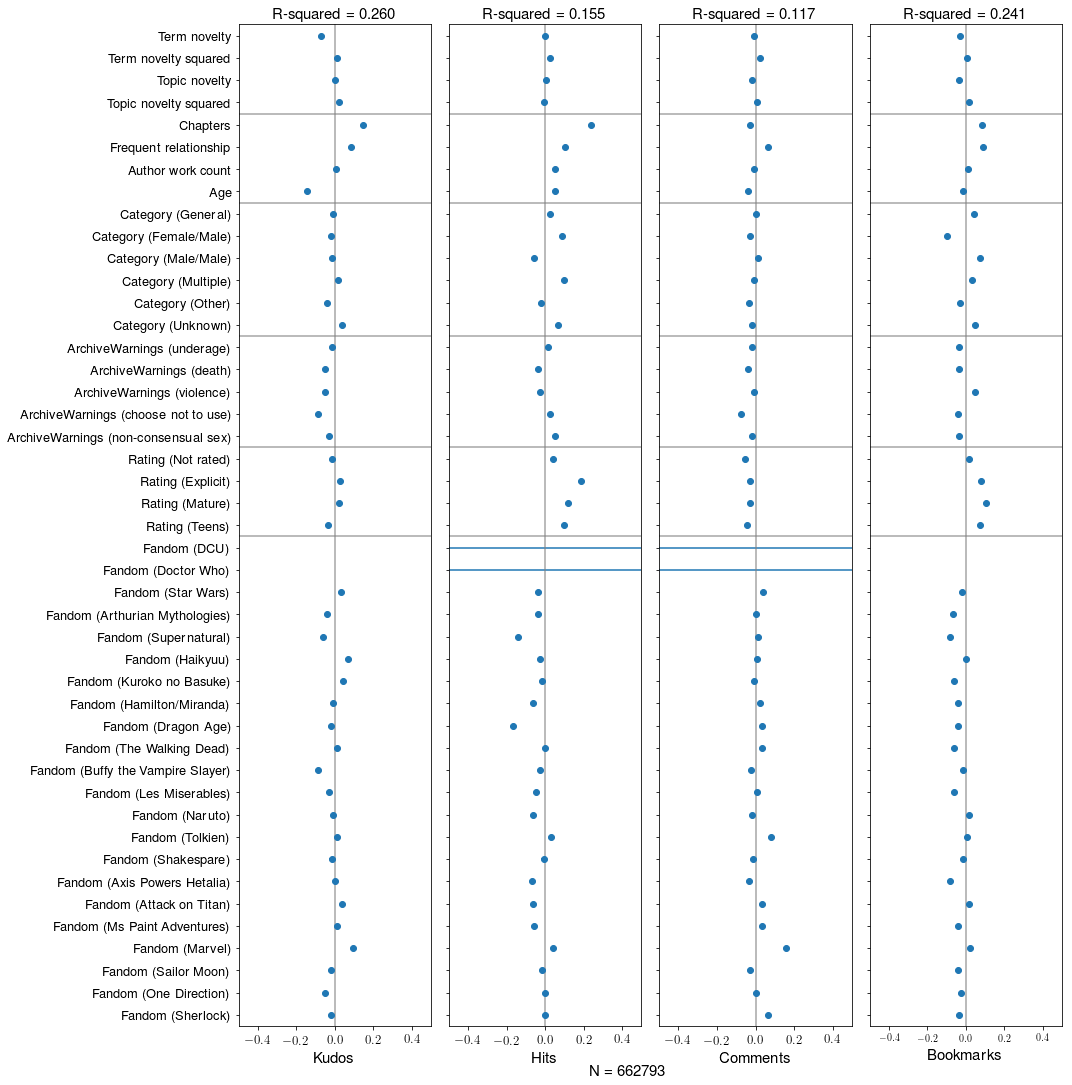

In [41]:
fig, ax = plt.subplots(1,4,figsize = (15,15))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [21.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [25.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [30.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [36.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [40.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(-0.5,44.5)
ax[0].set_xlim(-0.5,0.5)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.260', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,3), [21.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,3), [25.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,3), [30.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,3), [36.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,3), [40.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(-0.5,44.5)
ax[1].set_xlim(-0.5,0.5)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.155', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [40.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(-0.5,44.5)
ax[2].set_xlim(-0.5,0.5)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.117', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [40.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(-0.5,44.5)
ax[3].set_xlim(-0.5,0.5)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared = 0.241', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
fig.text(0.55, 0.001, 'N = 662793', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_full.pdf', format='pdf')

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWa

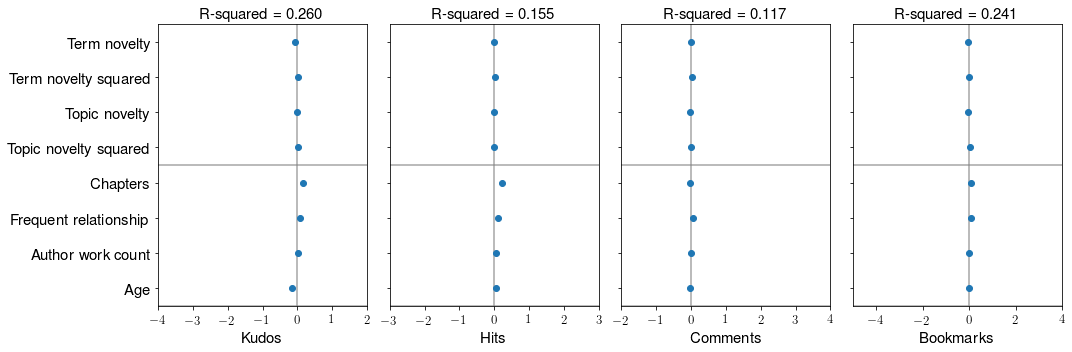

In [43]:
fig, ax = plt.subplots(1,4,figsize = (15,5))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')
# ax[0].errorbar(kudos_coef[::-1][43], 43, xerr=kudos_err[::-1][43], marker="x",c='blue')
# ax[0].errorbar(kudos_coef[::-1][43:46], range(len(kudos_coef[43:46])), xerr=kudos_err[::-1][43:46] , marker='o')
ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [21.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [25.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [30.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [36.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,3), [40.5 for i in range(-8,3)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(36.5,44.5)
ax[0].set_xlim(-4,2)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.260', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)    

ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,5), [40.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(36.5,44.5)
ax[1].set_xlim(-3,3)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.155', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,5), [40.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(36.5,44.5)
ax[2].set_xlim(-2,4)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.117', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [21.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [25.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [30.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [36.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,5), [40.5 for i in range(-8,5)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(36.5,44.5)
ax[3].set_xlim(-5,4)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared = 0.241', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[3].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
plt.tight_layout()
plt.savefig('ols_coefs_partial.pdf', format='pdf')

In [21]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     280.7
Date:                Thu, 13 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:06:53   Log-Likelihood:            -1.6251e+05
No. Observations:              101304   AIC:                         3.251e+05
Df Residuals:                  101258   BIC:                         3.255e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [22]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     471.6
Date:                Thu, 13 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:06:53   Log-Likelihood:            -1.7363e+05
No. Observations:              101304   AIC:                         3.474e+05
Df Residuals:                  101258   BIC:                         3.478e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [23]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     223.9
Date:                Thu, 13 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:06:53   Log-Likelihood:            -1.1203e+05
No. Observations:              101304   AIC:                         2.241e+05
Df Residuals:                  101258   BIC:                         2.246e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [24]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 13 Sep 2018   Prob (F-statistic):               0.00
Time:                        12:06:53   Log-Likelihood:            -1.6126e+05
No. Observations:              101304   AIC:                         3.226e+05
Df Residuals:                  101258   BIC:                         3.231e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           